# 11. Lab11-1_CNN Basics

> Convolutional Neural Networks

### 2018.09.29(토)

![lec11_19](../../img/lec11_19.png)

### CNN 은 크게 세가지 단계로 진행된다.
1. Convolution 단계 : fillter를 사용하여 image에서 값들을 뽑아 여러개(depth)로 만든다.
2. Subsampling 단계 : CONV 이후 나온 data가 크므로, 이를 작게 resizing 한다.
3. Classification 단계 : Feature extraction 된 output 값을 일반적인 Farward Neural Net을 이용하여 Fully connected Network 를 통해 Classification 또는 Regression 을 진행한다.

![lec11_20](../../img/lec11_20.png)

CNN은 Image 처리에서 정말 큰 역할을 해내고 있는데, 그 중 최근에는 서울 아산병원에서 진행된 CT image 분석 컨테스트에 참가하여 수상까지 해냄


In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

/Users/Choi-seonyeol/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## TensorFlow를 이용한 간단한 CNN 구현

다음 그림과 같은 구조의 아주 간단한 CNN을 구현해보자.

![lec11_21](../../img/lec11_21.png)

### Input Data
3\*3\*1 ( 흑백 ) 의 아주 간단한 image

(1, 3, 3, 1)


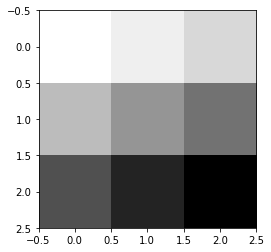

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

### Filter : padding 없이 해보기
2\*2\*1 (흑백)짜리 Filter 1개 -> filter : 2,2,1,1 <br>
Stride : 1\*1 -> 한칸씩 이동 <br>
Padding : VALID -> 적용하지 않음 <br>
![lec11_22](../../img/lec11_22.png)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


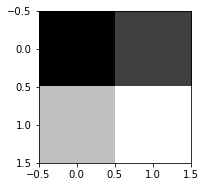

In [3]:
# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
# 즉, 우리가 위의 conv를 일일히 하나씩 다 처리하지 않아도, 이미 sride 와 padding  을 적용할 수 있는 nn.conv2d 가 tensorflor 에서 제공되고 있다.
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

### Filter : padding을 SAME으로 주고 하기
2\*2\*1 (흑백)짜리 Filter 1개 -> filter : 2,2,1,1 <br>
Stride : 1\*1 -> 한칸씩 이동 <br>
Padding : SAME -> Zero-padding하여 Input과 동일한 size의 output을 위한. <br>
![lec11_23](../../img/lec11_23.png)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


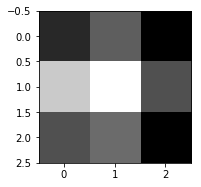

In [5]:
# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
# 즉, 우리가 위의 conv를 일일히 하나씩 다 처리하지 않아도, 이미 sride 와 padding  을 적용할 수 있는 nn.conv2d 가 tensorflor 에서 제공되고 있다.
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
    # 여기서, 도출된 결과값이 3 by 3 임에 주의해서 출력해주어야 한다.

### Filter : Filter 의 개수를 3개로 하기. [2,2,1,3]
2\*2\*3 (흑백)짜리 Filter 3개 -> filter : 2,2,1,3 <br>
Stride : 1\*1<br>
Padding : SAME

#### 한장의 image 로부터 3장의 image가 나오는것이 핵심 -> CONV 의 power!

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


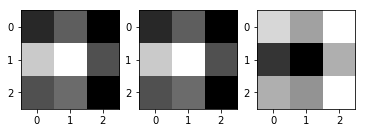

In [7]:
# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## Max Pooling
resize : [1,2,2,1] -> 2\*2 짜리 흑백 image 로 각각 한장씩<br>
stride : [1,1,1,1] -> 한칸씩 이동<br>
padding : "SAME" -> 같은 size 가 적용되도록 zero-padding
![lec11_24](../../img/lec11_24.png)

In [9]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],strides=[1, 1, 1, 1], padding='SAME')
# [1,2,2,1] => [one image, width, height, one channel]
# Max Pooling 또한 nn에 구현되어있어서, 우리는 size 와 stride, padding 만 설정하여주면 작동한다.
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


# 이것을 실제 이미지에 적용해보기

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


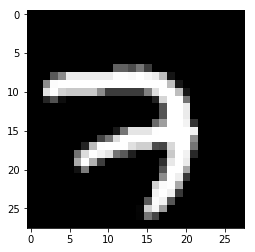

In [20]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

## MNIST Convolution layer 통과시키기

/Users/Choi-seonyeol/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_9:0", shape=(1, 14, 14, 5), dtype=float32)


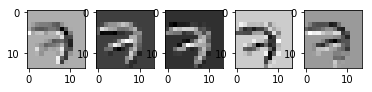

In [26]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
# [width, height, depth, number of filter]
# 3*3 짜리 흑백 filter 5개를 이용한다. 표준편차는 0.01
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
# stride : [one image, width, height, one channel]
# nn.conv2d 만으로 끝!
# 여기서, stride를 2*2 이므로, 두칸씩 움직이므로, output은 14*14 size 가 된다.
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

## MNIST Max pooling 
-> 14\*14 size의 image를 7\*7 size의 이미지로 바꾼다.

Tensor("MaxPool_3:0", shape=(1, 7, 7, 5), dtype=float32)


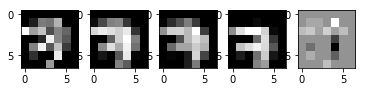

In [28]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# 2*2 짜리 size의 kernel (즉, mask)를 이용하여 2칸씩 (stride)이동, zero-padding
# [1,2,2,1] => [one image, width, height, one channel]
# stride가 2이므로, 크기는 또 줄어든다 (14,14,1) -> (7,7,1)
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')